### 导包

In [1]:
import pandas as pd
import numpy as np
import collections #统计
from wordcloud import WordCloud,ImageColorGenerator #分词
import matplotlib.pyplot as plt #作图
from pyecharts import Pie #作图
from pyecharts import Bar, Line,Overlap #作图
import pygal #作图
import operator  
import nltk #自然语言处理包
from nltk.collocations import * 
from gensim.models import word2vec #词向量
import re

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\lml\utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'
D:\Anaconda\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


### 对文本进行分词，单个字

In [3]:
# 对文本进行分词，单个字
stopWords="而|何|乎|乃|其|且|若|所|为|焉|也|以|因|于|与|则|者|之|然|是|此|斯|彼|孰|胡|曷|虽|矣|哉|耳"
def cut_word(text):
    words =[e for e in text if (e.isalnum() and e not in stopWords)]
    return words

In [101]:
# dynasty=r'宋代'
# path = r'C:/Users/HP/新建文件夹/pa_chong/poem/朝代/'+dynasty+r'total.csv'
# path2 = r'C:/Users/HP/新建文件夹/pa_chong/poem/朝代/'+dynasty+r'.txt'
path = r'C:/Users/HP/新建文件夹/pa_chong/poem/total.csv'
path2 = r'C:/Users/HP/新建文件夹/pa_chong/poem/total.txt'
f=open(path,'rb')
content = pd.read_csv(f, header=None)[1:]
f.close()
poem=content[3]
pos=1
length= len(poem)

In [102]:
try:
    while pos<=length:
        words=[]
        try:
            for i in range(1,length+1):
                words=words+cut_word(poem.get(pos))
                pos=pos+1
                if(pos%1000==0):
                    print(pos)
                    break
        except Exception as e:
            pass
        f = open(path2,'a+',encoding='utf-8')
        for word in words:
            f.write(word)
        f.close()
except Exception as e:
    print(e)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000
15

### 读取诗词内容(未中断版)

In [85]:
# 读取诗词内容
dynasty=r'隋代'
path = r'C:/Users/HP/新建文件夹/pa_chong/poem/朝代/'+dynasty+r'total.csv'
f=open(path,'rb')
content = pd.read_csv(f, header=None)[1:]
f.close()
poem=content[3]
words=[]
i=0
for item in poem:
    i=i+1
    if(i%50==0):
        print(i)
    words=words+cut_word(item)
    


50
100


In [86]:

# 将分词结果写入文件

path = r'C:/Users/HP/新建文件夹/pa_chong/poem/朝代/'+dynasty+r'.txt'

f = open(path,'w+',encoding='utf-8')
for word in words:
    f.write(word)
f.close()

In [29]:
path2 = r'C:/Users/HP/新建文件夹/pa_chong/poem/朝代/唐代.txt'


In [30]:
# 从文件读取分词
with open(path2,encoding='utf-8') as f:
    line = f.readline()
words = list(line)

### 词频统计

In [44]:
# 词频统计
mycount = collections.Counter(words)
i = 1
for key, val in mycount.most_common(40):  # 有序（返回前x个）
    print(i,'\t',key,'\t', val)
    i = i+1

### 生成词云

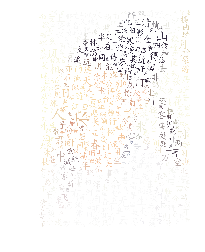

In [38]:
# 生成词云
font_path = "D:\Fonts\simkai.ttf"#字体路径
wc = WordCloud(
    background_color="white", #背景颜色
    max_words=500, #显示最大词数
    font_path=font_path,
    min_font_size=5,
    max_font_size=100, 
    mask=plt.imread("poem2.jpg"),
)
wc.generate_from_frequencies(mycount)
back_coloring = plt.imread("poem2.jpg")
image_colors = ImageColorGenerator(back_coloring)
plt.imshow(wc.recolor(color_func=image_colors))
# 绘制背景图片为颜色的图片
plt.axis("off")
plt.figure()
# plt.imshow(back_coloring, cmap=plt.cm.gray)
plt.show()
# 保存图片
wc.to_file("wordcloud.jpg")

### 对四季的处理

In [43]:
# 查询季节出现的频率
season = {'春':0,'夏':0,'秋':0,'冬':0}
for s in list(season.keys()):
    season[s] = mycount.get(s,0)
print(season)

# 制作季节分布饼图
attr = ['春', '夏', '秋', '冬']
value = [season.get("春",0),season.get("夏",0),season.get("秋",0), season.get("冬",0)]
pie = Pie('诗词季节分析示意图', title_pos='center', width=900)
pie.add('7-17', attr, value, center=[75, 50], is_random=True,
        radius=[30, 75], rosetype='area',
        is_legend_show=False, is_label_show=True)
pie


# labels = ['春', '夏', '秋', '冬']
# fracs = [season.get("春",0),season.get("夏",0),season.get("秋",0), season.get("冬",0)]
# explode = [0.1,0,0,0] # 0.1 凸出这部分，
# plt.axes(aspect=1)  # set this , Figure is round, otherwise it is an ellipse
# plt.pie(x=fracs, labels=labels, explode=explode,autopct='%3.1f %%',
#         shadow=True, labeldistance=1.1, startangle = 90,pctdistance = 0.6)
# '''
# labeldistance，文本的位置离远点有多远，1.1指1.1倍半径的位置
# autopct，圆里面的文本格式，%3.1f%%表示小数有三位，整数有一位的浮点数
# shadow，饼是否有阴影
# startangle，起始角度，0，表示从0开始逆时针转，为第一块。一般选择从90度开始比较好看
# pctdistance，百分比的text离圆心的距离
# patches, l_texts, p_texts，为了得到饼图的返回值，p_texts饼图内部文本的，l_texts饼图外label的文本
# '''
# plt.show()

In [42]:
pie = Pie("唐宋元明清四季出现比例", title_pos='center', width=1000, height=600)
pie.add("唐代", ['春', '夏', '秋', '冬'], [12622, 1049, 9111, 658], radius=[56, 68],is_label_show=True)
pie.add("宋代", ['春', '夏', '秋', '冬'], [41334, 2453, 24033, 2193], radius=[42, 54], legend_orient='vertical', legend_pos='left')
pie.add("元代", ['春', '夏', '秋', '冬'], [9437, 569, 6483, 540], radius=[28, 40], legend_orient='vertical', legend_pos='left')
pie.add("明代", ['春', '夏', '秋', '冬'], [18205, 1135, 14391, 977], radius=[14, 26], legend_orient='vertical', legend_pos='left')
pie.add("清代", ['春', '夏', '秋', '冬'], [12934, 570, 9484, 632], radius=[0, 12], legend_orient='vertical', legend_pos='left')
pie.show_config()
pie.render()
pie

### 对颜色的处理

In [4]:
# 查询颜色频率

black = {'暗':0,'玄':0,'乌':0,'冥':0,'墨':0,'皂':0,'黧':0,'缁':0, '黔':0,'黦':0}
white = {'白':0,'素':0,'皎':0,'皓':0,'皙':0,'皑':0}
red =   {'红':0,'丹':0,'朱':0,'赤':0,'绛':0,'赫':0,'彤':0,'茜':0,'绯':0,'赩':0,'纁':0,'缇':0,'殷':0,'赭':0}
green = {'绿':0,'碧':0,'翠':0,'苍':0,'沧':0,'缥':0}

# 总体分布

# 黑色系分布
for s in list(black.keys()):
    black[s] = mycount.get(s,0)
print(black)
int_black=0
for i in black.values():
    int_black=int_black+i

# 白色系分布
for s in list(white.keys()):
    white[s] = mycount.get(s,0)
print(white)
int_white=0
for i in white.values():
    int_white=int_white+i

# 红色系分布
for s in list(red.keys()):
    red[s] = mycount.get(s,0)
print(red)
int_red=0
for i in red.values():
    int_red=int_red+i

# 绿色系分布
for s in list(green.keys()):
    green[s] = mycount.get(s,0)
print(green)
int_green=0
for i in green.values():
    int_green=int_green+i
    
# 总体分布
total = {}
total.update(black)
total.update(white)
total.update(red)
total.update(green)

{'暗': 1902, '玄': 1282, '乌': 908, '冥': 1081, '墨': 458, '皂': 80, '黧': 1, '缁': 93, '黔': 93, '黦': 7}
{'白': 9673, '素': 1336, '皎': 367, '皓': 343, '皙': 13, '皑': 34}
{'红': 4734, '丹': 2129, '朱': 1583, '赤': 896, '绛': 297, '赫': 233, '彤': 130, '茜': 37, '绯': 47, '赩': 17, '纁': 10, '缇': 28, '殷': 701, '赭': 44}
{'绿': 3199, '碧': 3257, '翠': 2904, '苍': 2479, '沧': 1154, '缥': 156}


In [41]:
# 根据色系画出环状图
pie_chart = pygal.Pie(inner_radius=.6,)#inner_radius 越大圆心空心越大
pie_chart.title = '唐代诗词颜色饼图'
# for k in black.keys():
#     pie_chart.add(k, black.get(k))
# pie_chart.render_to_file('bar_chart.svg')
pie_chart.add('黑色系', int_black)
pie_chart.add('白色系', int_white)
pie_chart.add('红色系', int_red)
pie_chart.add('绿色系',int_green)
pie_chart.render()
# pie_chart.render_to_file('bar_chart.svg')
pie_chart

In [9]:
# 根据色彩分布画出折线图
sorted_total_list = sorted(total.items(), key=operator.itemgetter(1), reverse=True) #对字典根据值排序
top=sorted_total_list[0:12]
attr=[]
value=[]
for (a,b) in top:
    attr.append(a)
    value.append(b)

line = Line('主要颜色排列')
line.add("颜色", attr, value, is_stack=True, xaxis_rotate=30, yaxis_min=0, mark_point=["min", "max"], xaxis_interval=0,
         line_color='lightblue', line_width=4, mark_point_textcolor='black', mark_point_color='lightblue', is_splitline_show=True)
line.render('主要颜色排列.html')

In [40]:
import pygal

dot_chart = pygal.Dot()
dot_chart.title = '唐宋元明清色彩出现频率对比图'
# dot_chart.x_labels = ['白', '红', '碧', '绿', '翠', '苍', '丹', '暗', '朱','素', '玄', '沧']
# dot_chart.add('Chrome', [9673, 4734, 3257, 3199, 2904, 2479, 2129, 1902,1583,1336,1282,1154])
dot_chart.x_labels = ['黑','白', '红', '绿']
dot_chart.add('唐代', [5905/41706, 11766/41706, 10886/41706, 13149/41706])
dot_chart.add('宋代', [17136/115631, 28512/115631, 32766/115631, 37217/115631])
dot_chart.add('元代', [5180/33868, 9736/33868, 9145/33868, 9807/33868])
dot_chart.add('明代', [9023/61541, 18630/61541, 15180/61541, 18708/61541])
dot_chart.add('清代', [6322/44042, 9805/44042, 13245/44042, 14670/44042])

dot_chart

### 梅兰竹菊

In [73]:
path2 = r'C:/Users/HP/新建文件夹/pa_chong/poem/朝代/五代.txt'
# 从文件读取分词
with open(path2,encoding='utf-8') as f:
    line = f.readline()
words = list(line)
mycount = collections.Counter(words)

In [74]:
# 查询季节出现的频率
season = {'梅':0,'兰':0,'竹':0,'菊':0}
for s in list(season.keys()):
    season[s] = mycount.get(s,0)
print(season)
seasonList = ['梅','兰','竹','菊']
l=[]
for i in seasonList:
    l.append(season.get(i))
#     print(season.get(i),end=' ')
print(l)

{'梅': 43, '兰': 60, '竹': 29, '菊': 15}
[43, 60, 29, 15]


In [80]:
# 先秦
# {'梅': 2, '兰': 47, '竹': 0, '菊': 4}
# [2, 47, 0, 4]

# 两汉
# {'梅': 4, '兰': 91, '竹': 28, '菊': 4}
# [4, 91, 28, 4]

# 魏晋
# {'梅': 3, '兰': 118, '竹': 46, '菊': 14}
# [3, 118, 46, 14]

# 南北朝
# {'梅': 127, '兰': 330, '竹': 243, '菊': 60}
# [127, 330, 243, 60]

# 唐代
# {'梅': 1240, '兰': 1831, '竹': 3753, '菊': 878}
# [1240, 1831, 3753, 878]

# 宋代
# {'梅': 11191, '兰': 4587, '竹': 11651, '菊': 3626}
# [11191, 4587, 11651, 3626]

# 元代
# {'梅': 2822, '兰': 1109, '竹': 2482, '菊': 770}
# [2822, 1109, 2482, 770]

# 明代
# {'梅': 3163, '兰': 2641, '竹': 5322, '菊': 1373}
# [3163, 2641, 5322, 1373]

# 清代
# {'梅': 2695, '兰': 2269, '竹': 2713, '菊': 821}
# [2695, 2269, 2713, 821]



In [75]:
def getmean(l):
    return [i/np.sum(l) for i in l]

In [82]:
def chuli(li):
    lis = [[],[],[],[]]
    for i in li:
        for j in range(0,4):
            lis[j].append(getmean(i)[j])
    return lis

In [84]:
test = [[2, 47, 0, 4],[4, 91, 28, 4],[3, 118, 46, 14],[127, 330, 243, 60],[1240, 1831, 3753, 878],[11191, 4587, 11651, 3626],[2822, 1109, 2482, 770],[3163, 2641, 5322, 1373],[2695, 2269, 2713, 821]]

In [85]:
chuli(test)

[[0.03773584905660377,
  0.031496062992125984,
  0.016574585635359115,
  0.16710526315789473,
  0.16099714359906517,
  0.3603606504588633,
  0.39287205902826117,
  0.25306024481958556,
  0.3171334431630972],
 [0.8867924528301887,
  0.7165354330708661,
  0.6519337016574586,
  0.4342105263157895,
  0.2377304596208777,
  0.1477056834648205,
  0.15439231518863986,
  0.21129690375230017,
  0.267004000941398],
 [0.0,
  0.2204724409448819,
  0.2541436464088398,
  0.31973684210526315,
  0.4872760321994287,
  0.37517308001932054,
  0.345538076012808,
  0.42579406352508203,
  0.3192515886090845],
 [0.07547169811320754,
  0.031496062992125984,
  0.07734806629834254,
  0.07894736842105263,
  0.11399636458062841,
  0.11676058605699566,
  0.10719754977029096,
  0.10984878790303225,
  0.09661096728642034]]

In [76]:
getmean([2695, 2269, 2713, 821])

[0.3171334431630972,
 0.267004000941398,
 0.3192515886090845,
 0.09661096728642034]

In [89]:
import pygal

# line_chart = pygal.Line()
line_chart = pygal.StackedLine(fill=True)
line_chart.title = '历朝历代文人对梅兰竹菊的偏爱'
line_chart.x_labels =['先秦','两汉','魏晋','南北朝','唐','宋','元','明','清']
line_chart.add('梅', [0.03773584905660377,
  0.031496062992125984,
  0.016574585635359115,
  0.16710526315789473,
  0.16099714359906517,
  0.3603606504588633,
  0.39287205902826117,
  0.25306024481958556,
  0.3171334431630972])
line_chart.add('兰',  [0.8867924528301887,
  0.7165354330708661,
  0.6519337016574586,
  0.4342105263157895,
  0.2377304596208777,
  0.1477056834648205,
  0.15439231518863986,
  0.21129690375230017,
  0.267004000941398])
line_chart.add('竹',      [0.0,
  0.2204724409448819,
  0.2541436464088398,
  0.31973684210526315,
  0.4872760321994287,
  0.37517308001932054,
  0.345538076012808,
  0.42579406352508203,
  0.3192515886090845])
line_chart.add('菊',  [0.07547169811320754,
  0.031496062992125984,
  0.07734806629834254,
  0.07894736842105263,
  0.11399636458062841,
  0.11676058605699566,
  0.10719754977029096,
  0.10984878790303225,
  0.09661096728642034])
line_chart.render_to_file("line-basic.svg")

### 常用双字词发现

In [19]:
# # 发现对中文不适用
# tokens=nltk.wordpunct_tokenize(str)
# bigram=nltk.bigrams(tokens)
# list(bigram)

In [32]:
# 使用nltk 自然语言处理库来进行二元词的处理
# 通过两两分词 发现相邻的双字的频率

bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(words)
# for bigram in finder.score_ngrams(bigram_measures.raw_freq)[:100]:
#     print(bigram)

In [36]:
i=0
for bigram in finder.score_ngrams(bigram_measures.raw_freq)[:110]:
    print(bigram[0][0]+bigram[0][1])
    i = i+1
    if(i%10==0):
        print()

### 语义网络分析：发现唐诗中的常用“字眼”

 ### 字向量分析：基于的Word2vec的关联字分析

In [2]:
path = r'C:/Users/HP/新建文件夹/pa_chong/poem/朝代/唐代total.csv'
f=open(path,'rb')
content = pd.read_csv(f, header=None)[1:]
f.close()
poem=content[3]
# 用 word2vec 进行训练
# 第一个参数是训练语料，第二个参数是小于该数的单词会被剔除，默认值为5, 第三个参数是神经网络的隐藏层单元数，默认为100
model=word2vec.Word2Vec(list(poem),min_count=3, size=50, window=5, workers=4)#唐诗

In [37]:
for i in model.wv.most_similar("涛"): #计算余弦距离最接近的10个词
#     print(i[0],end=' ')
    print(i[0],i[1])

In [38]:
# 用 word2vec 进行训练
# 第一个参数是训练语料，第二个参数是小于该数的单词会被剔除，默认值为5, 第三个参数是神经网络的隐藏层单元数，默认为100
model=word2vec.Word2Vec(list(poem),min_count=3, size=50, window=5, workers=4)

# y2=model.similarity("春", "秋") #计算两个词之间的余弦距离
# print(y2)
# for i in model.wv.most_similar("春"): #计算余弦距离最接近的10个词
#     print(i[0],i[1])
# print("-----------------------------------------------------------------------------")
# 悲、惧、乐、怒、思、喜、忧
for i in model.wv.most_similar(u"愁"): #
    print(i[0],i[1])
print("-----------------------------------------------------------------------------")
for i in model.wv.most_similar("惧"): #
    print(i[0],i[1])
print("-----------------------------------------------------------------------------")
for i in model.wv.most_similar("乐"): #
    print(i[0],i[1])
print("-----------------------------------------------------------------------------")
for i in model.wv.most_similar("怒"): #
    print(i[0],i[1])
print("-----------------------------------------------------------------------------")
for i in model.wv.most_similar("思"): #
    print(i[0],i[1])
print("-----------------------------------------------------------------------------")
for i in model.wv.most_similar("喜"): #
    print(i[0],i[1])
print("-----------------------------------------------------------------------------")
for i in model.wv.most_similar("忧"): #
    print(i[0],i[1])
print("-----------------------------------------------------------------------------")


### 多维情绪分析：发现‘情绪’

#### 根据朝代名称加载诗词

In [ ]:
def getPoems(dynasty):
    path = r'C:/Users/HP/新建文件夹/pa_chong/poem/朝代/'+dynasty+r'total.csv'
    f=open(path,'rb')
    content = pd.read_csv(f, header=None)[1:]
    f.close()
    poem=content[3]
    return poem

#### 加载全部诗词 作为训练样本

In [4]:
def load():
    path = r'C:/Users/HP/新建文件夹/pa_chong/poem/total.csv'
    f=open(path,'rb')
    content = pd.read_csv(f, header=None)[1:]
    f.close()
    poem=content[3]
    return poem

#### 根据情绪词获得与之最相关的50个词

In [5]:
def get_emotion_list(emotion):
    list_re=[]
    for i in model.wv.most_similar(emotion,topn=50):
        list_re.append(i[0])
    return list_re

#### 初始化 情绪关键词列表

In [6]:
def ini_emotion_list():
    list_re=[]
    emotions=['喜','愤','愁','思','怨']
    for i in emotions:
        list_re.append(get_emotion_list(i))
    return list_re

#### 给定poem诗句，分析在emotion（情绪近义词列表）的相似得分

In [7]:
def get_emotion_score(poem,emotion):
    score=0
    for i in poem: 
        for j in emotion:
            try:
                temp=model.wv.similarity(i, j)
            except:
                temp=0
            score = score + temp
    return score

#### 根据诗句 返回最可能的情绪类别

In [8]:
def getScore(poem,emotion_list):
    emotions=['喜','愤','愁','思','怨']
    list_score=[]
    for emotion in emotion_list:
        score=get_emotion_score(poem,emotion)
        list_score.append(score)
#     print(list_score)
    min_score=min(list_score)
    max_score=max(list_score)
    difference=max_score-min_score
    pos = list_score.index(max_score)
    list_score=[(i-min_score)/difference for i in list_score]
#     print(list_score)
    return emotions[pos]

#### 给定诗词集合，给出最终感情分布（字典）

In [9]:
def distribution(poems):
    distribute_dict={}
    i=0
    length = len(poems)
    emotion_list=ini_emotion_list()
    for poem in poems:
        i=i+1
        t=getScore(poem,emotion_list)
        distribute_dict[t]=distribute_dict.get(t,0)+1

        if i%100==0:
            print(str(i)+"       -------------"+str(i/length))  
    return distribute_dict

#### 调用函数进行分析

In [30]:
# 结果如下：
dynasty_tang={'喜':9759,'思':13370,'怨':2357,'愁':20925,'愤':4096}
dynasty_nanbeichao={'喜': 1148, '思': 1297, '怨': 427, '愁': 1046, '愤': 806}
dynasty_jin={'喜': 176, '思': 295, '怨': 26, '愁': 620, '愤': 54}
dynasty_ming={'喜': 19007, '思':19986 , '怨':2849 , '愁':30279 , '愤': 7089}
dynasty_wudai={'喜': 65, '思': 20, '怨': 7, '愁': 584, '愤': 12}
dynasty_weijin={'喜': 251, '思': 369, '怨': 59, '愁': 81, '愤': 428}
dynasty_suidai={'喜': 29, '思': 43, '怨': 11, '愁': 47, '愤': 11}
dynasty_xianqin={'喜': 3, '怨': 2, '愤': 72}
dynasty_lianghan={'喜': 142, '思': 133, '怨': 31, '愁': 57, '愤': 260}
dynasty_qing={'喜': 7317, '思': 8985, '怨': 1911, '愁': 25028, '愤': 3452}
dynasty_song={'喜':48809 , '思':36345 , '怨':6333 , '愁':67949 , '愤':14463 }
dynasty_yuan={'喜': 6841, '思': 5922, '怨': 1095, '愁': 12089, '愤': 1991}

In [10]:
# 训练样本
total=load()
model=word2vec.Word2Vec(list(total),min_count=3, size=100, window=5, workers=4)

In [11]:
#根据朝代加载诗句
dynasty = '宋代'
poems = getPoems(dynasty)

In [ ]:
fenbu = distribution(poems)

### 射覆 

#### 加载训练样本

In [12]:
def load():
    path = r'C:/Users/HP/新建文件夹/pa_chong/poem/total.csv'
    f=open(path,'rb')
    content = pd.read_csv(f, header=None)[1:]
    f.close()
    poem=content[3]
    return poem

#### 加载查询空间

In [13]:
def getPoems(dynasty):
    path = r'C:/Users/HP/新建文件夹/pa_chong/poem/朝代/'+dynasty+r'total.csv'
    f=open(path,'rb')
    content = pd.read_csv(f, header=None)[1:]
    f.close()
    poem=content[3]
    return poem

def make_sentence(poem):
    sentence = [i for i in re.split('[。?!？；！]', poem) if len(i)>1]
    return sentence

def get_sentences(poems):
    length= len(poems)
    pos=1
    sentence=[]
    while pos<=length:
        words=[]
        try:
            for i in range(pos,length+1):
                words=words+make_sentence(poems.get(pos))
                pos=pos+1
                if(pos%100==0):
                    print(pos)
                    break
        except Exception as e:
            print(e)

        sentence=sentence+words
    return sentence


#### 获取两句诗相似性

In [14]:
def similar(poem1,poem2):
    total_score=0
    for i in poem1:
        score=0
        for j in poem2:
            try:
                temp = model.wv.similarity(i, j)
            except:
                temp=0
            if temp>score:
                score=temp
        total_score= total_score+score
    return total_score/len(poem1)
        

#### 获取与诗句相似度排序列表

In [19]:
def get_similar_sentences(sentence,sentences):
    find_list={}
    total = len(sentences)
    pos =0;
    for i in sentences:
        pos=pos+1
        if len(i.split('，'))!=2:
            continue
        find_list[i]=similar(sentence,i)
        if pos%100==0:
            print(pos)
    sortlist=sorted(find_list.items(),key = lambda x:x[1],reverse = True)
    return sortlist 

#### 调用函数进行分析

In [6]:
# 训练样本
total=load()
model=word2vec.Word2Vec(list(total),min_count=3, size=100, window=5, workers=4)

In [39]:
#获取查询空间
poems = getPoems('隋代')
sentences = get_sentences(poems)

In [ ]:
most_similar = get_similar_sentences('桃花 杨柳',sentences)

In [ ]:
most_similar[:10]